## Import Libraries & Data

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from matplotlib.pyplot import figure

from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [6]:
path = r'C:\Users\sstorer\OneDrive\ML Specialization'

In [7]:
df = pd.read_csv(os.path.join(path, 'Data Sets', '2016_PCA.csv'))

In [8]:
df

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,PCA11,PCA12,PCA13,PCA14,PCA15,PCA16,PCA17,PCA18
0,-9.549790,-2.736091,-1.861205,1.424372,3.000601,-0.335029,0.256017,0.321242,0.537931,0.611799,-0.570108,-1.808108,0.636037,-0.426550,1.385406,-1.236292,-0.286293,-0.809966
1,-10.429910,1.965507,-1.139305,0.736109,3.233884,-1.691461,-2.561737,-0.222544,1.281327,0.930917,0.013520,-0.261615,0.009635,0.061758,3.080873,-1.751571,0.571700,0.957357
2,-11.250177,4.658878,0.626021,2.867933,4.005163,-0.207409,-3.572881,0.031095,1.976074,1.856774,1.097620,-1.868251,-0.357535,-1.132962,1.329282,0.144958,1.073124,-0.068003
3,-11.110176,6.894853,2.623400,2.598854,3.821785,1.061520,-2.102408,2.686260,-0.261707,-0.914941,1.286800,-0.605906,0.392617,-0.219172,3.509095,-0.412003,0.700869,-0.793738
4,-10.203362,4.971759,2.155153,2.101020,3.826081,1.232282,-2.558288,1.873130,-0.135833,-1.172843,0.034060,0.713708,-0.530159,-2.208568,2.796601,-0.501690,0.066280,-1.251606
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,-6.532931,-6.722147,-1.635876,-2.535955,-2.190619,-0.456098,1.323825,-2.392868,-0.917658,0.713753,0.609348,1.202860,0.941690,-0.675747,-1.609730,0.815986,0.443766,0.395819
362,-8.803536,-7.639778,-3.028835,-2.866741,-2.383866,0.770351,1.864654,0.101353,0.002490,1.390063,-0.552735,-1.634626,3.079872,-0.929010,-2.026074,1.264510,0.150644,0.578796
363,-10.020369,-9.744315,-1.737558,-0.087509,-1.861523,-0.305650,3.286180,1.076453,2.068460,2.377124,-0.280325,-0.042723,0.703360,-0.960506,0.628310,1.293565,0.299433,2.046112
364,-9.988414,-9.471778,-2.901892,0.641128,-1.001323,0.014860,2.232759,0.042633,2.825267,2.248552,-1.746959,1.435791,0.638269,-0.624035,0.864206,0.307051,-1.997664,2.094033


In [9]:
pleasantweather = pd.read_csv(os.path.join(path, 'Data Sets', 'Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'))

In [10]:
pleasantweather

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,19600101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,19600102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,19600103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,19600104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,19600105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,20221027,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22946,20221028,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22947,20221029,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22948,20221030,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [11]:
# Reduce pleasant weather to 2016
pleasant2016 = pleasantweather[pleasantweather['DATE'].astype(str).str.contains('2016')]

In [12]:
pleasant2016.shape

(366, 16)

In [13]:
df.shape

(366, 18)

## Dendrograms Using Reduced Dataset

### Single Method

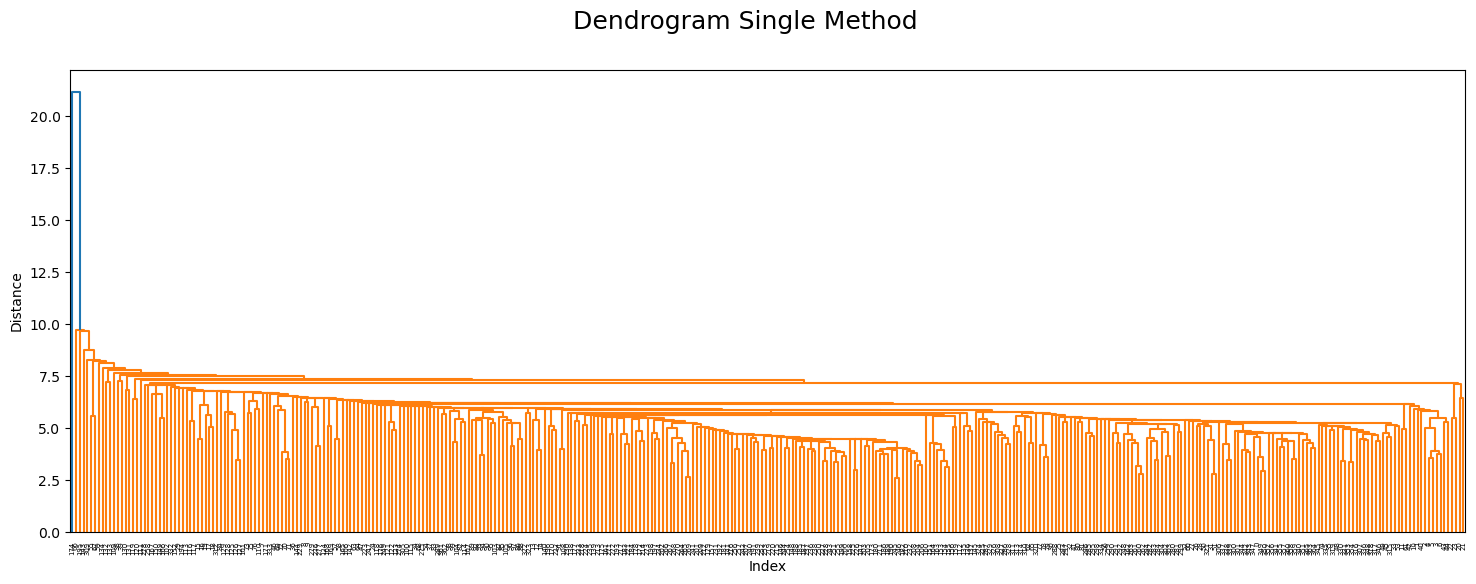

In [16]:
distance_single = linkage(df.loc[:,
['PCA1',
'PCA2',
'PCA3',
'PCA4',
'PCA5',
'PCA6',
'PCA7',
'PCA8',
'PCA9',
'PCA10',
'PCA11',
'PCA12',
'PCA13',
'PCA14',
'PCA15',
'PCA16',
'PCA17',
'PCA18']],method="single")
plt.figure(figsize=(18,6))
dendrogram(distance_single, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Single Method",fontsize=18)
plt.show()

### Complete Method

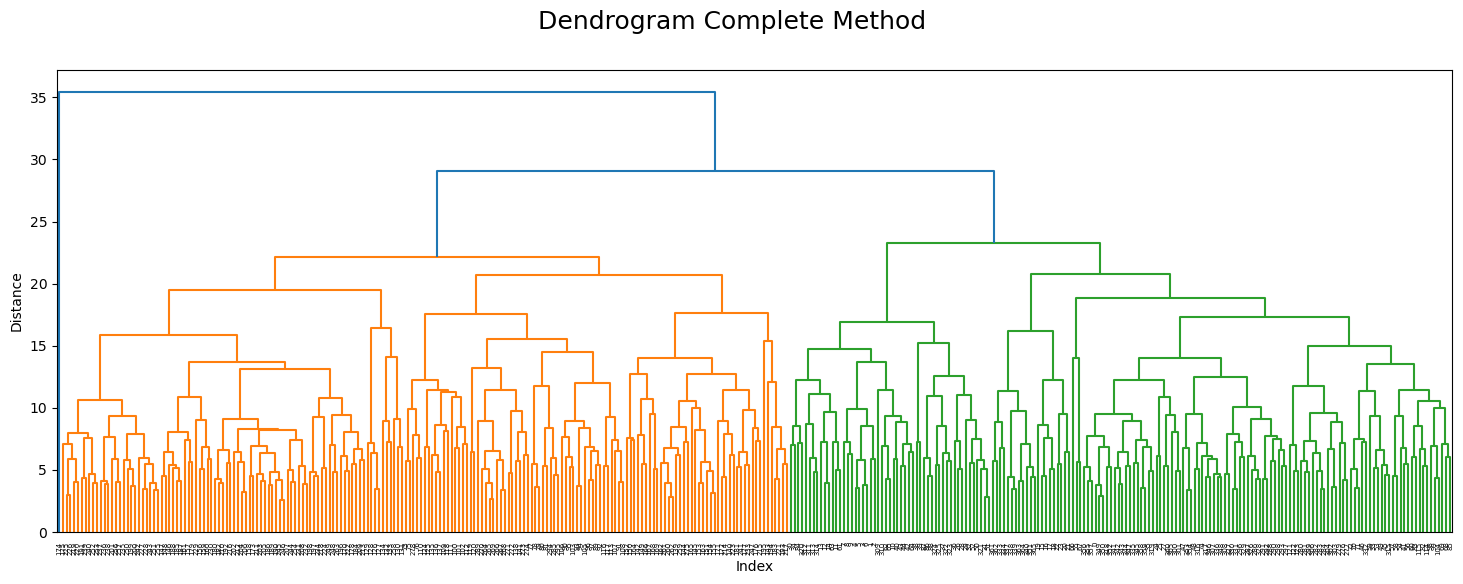

In [18]:
distance_single = linkage(df.loc[:,
['PCA1',
'PCA2',
'PCA3',
'PCA4',
'PCA5',
'PCA6',
'PCA7',
'PCA8',
'PCA9',
'PCA10',
'PCA11',
'PCA12',
'PCA13',
'PCA14',
'PCA15',
'PCA16',
'PCA17',
'PCA18']],method="complete")
plt.figure(figsize=(18,6))
dendrogram(distance_single, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Complete Method",fontsize=18)
plt.show()

### Average Method

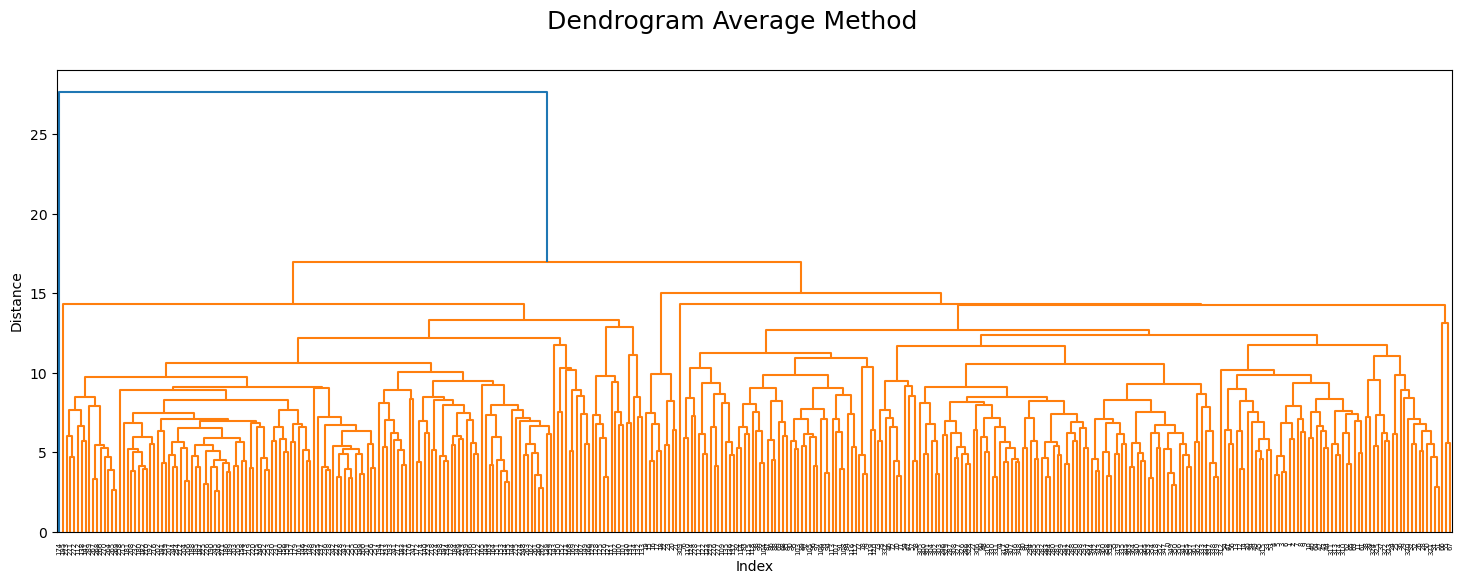

In [20]:
distance_single = linkage(df.loc[:,
['PCA1',
'PCA2',
'PCA3',
'PCA4',
'PCA5',
'PCA6',
'PCA7',
'PCA8',
'PCA9',
'PCA10',
'PCA11',
'PCA12',
'PCA13',
'PCA14',
'PCA15',
'PCA16',
'PCA17',
'PCA18']],method="average")
plt.figure(figsize=(18,6))
dendrogram(distance_single, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Average Method",fontsize=18)
plt.show()

### Ward Method

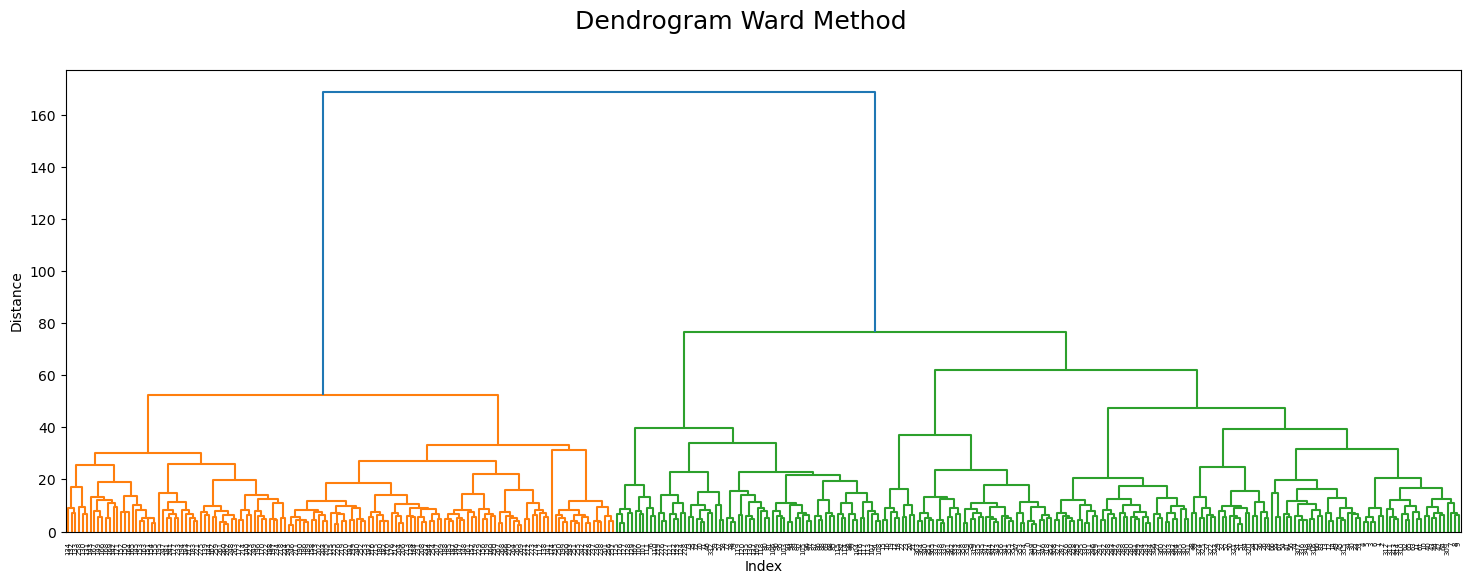

In [22]:
distance_single = linkage(df.loc[:,
['PCA1',
'PCA2',
'PCA3',
'PCA4',
'PCA5',
'PCA6',
'PCA7',
'PCA8',
'PCA9',
'PCA10',
'PCA11',
'PCA12',
'PCA13',
'PCA14',
'PCA15',
'PCA16',
'PCA17',
'PCA18']],method="ward")
plt.figure(figsize=(18,6))
dendrogram(distance_single, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Ward Method",fontsize=18)
plt.show()

## Compare to Actual Labels

In [24]:
# Determine clusters using number of clusters (n_clusters)
n_clusters = 2  # Set the desired number of clusters
clusters = fcluster(distance_single, n_clusters, criterion='maxclust')

In [25]:
df['cluster'] = clusters

In [26]:
df.head()

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,PCA11,PCA12,PCA13,PCA14,PCA15,PCA16,PCA17,PCA18,cluster
0,-9.549790,-2.736091,-1.861205,1.424372,3.000601,-0.335029,0.256017,0.321242,0.537931,0.611799,-0.570108,-1.808108,0.636037,-0.426550,1.385406,-1.236292,-0.286293,-0.809966,2
1,-10.429910,1.965507,-1.139305,0.736109,3.233884,-1.691461,-2.561737,-0.222544,1.281327,0.930917,0.013520,-0.261615,0.009635,0.061758,3.080873,-1.751571,0.571700,0.957357,2
2,-11.250177,4.658878,0.626021,2.867933,4.005163,-0.207409,-3.572881,0.031095,1.976074,1.856774,1.097620,-1.868251,-0.357535,-1.132962,1.329282,0.144958,1.073124,-0.068003,2
3,-11.110176,6.894853,2.623400,2.598854,3.821785,1.061520,-2.102408,2.686260,-0.261707,-0.914941,1.286800,-0.605906,0.392617,-0.219172,3.509095,-0.412003,0.700869,-0.793738,2
4,-10.203362,4.971759,2.155153,2.101020,3.826081,1.232282,-2.558288,1.873130,-0.135833,-1.172843,0.034060,0.713708,-0.530159,-2.208568,2.796601,-0.501690,0.066280,-1.251606,2


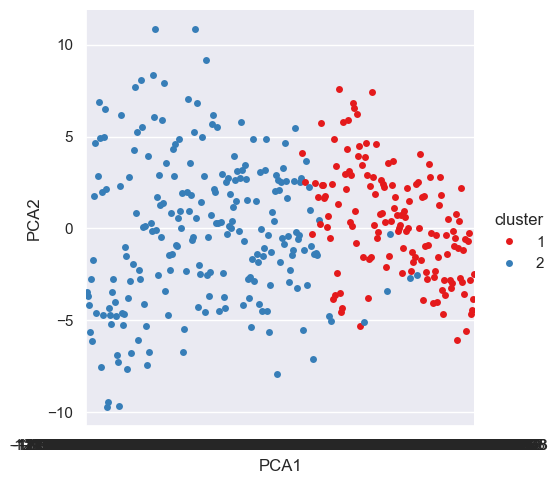

In [27]:
sns.set_theme()
g = sns.catplot(x="PCA1", y="PCA2", palette='Set1', hue="cluster", data=df)
plt.show()

In [28]:
df['BASEL_answers'] = pleasant2016['BASEL_pleasant_weather'].reset_index(drop=True)

In [30]:
df['MADRID_answers'] = pleasant2016['MADRID_pleasant_weather'].reset_index(drop=True)

In [31]:
df.head()

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,...,PCA12,PCA13,PCA14,PCA15,PCA16,PCA17,PCA18,cluster,BASEL_answers,MADRID_answers
0,-9.549790,-2.736091,-1.861205,1.424372,3.000601,-0.335029,0.256017,0.321242,0.537931,0.611799,...,-1.808108,0.636037,-0.426550,1.385406,-1.236292,-0.286293,-0.809966,2,0,0
1,-10.429910,1.965507,-1.139305,0.736109,3.233884,-1.691461,-2.561737,-0.222544,1.281327,0.930917,...,-0.261615,0.009635,0.061758,3.080873,-1.751571,0.571700,0.957357,2,0,0
2,-11.250177,4.658878,0.626021,2.867933,4.005163,-0.207409,-3.572881,0.031095,1.976074,1.856774,...,-1.868251,-0.357535,-1.132962,1.329282,0.144958,1.073124,-0.068003,2,0,0
3,-11.110176,6.894853,2.623400,2.598854,3.821785,1.061520,-2.102408,2.686260,-0.261707,-0.914941,...,-0.605906,0.392617,-0.219172,3.509095,-0.412003,0.700869,-0.793738,2,0,0
4,-10.203362,4.971759,2.155153,2.101020,3.826081,1.232282,-2.558288,1.873130,-0.135833,-1.172843,...,0.713708,-0.530159,-2.208568,2.796601,-0.501690,0.066280,-1.251606,2,0,0


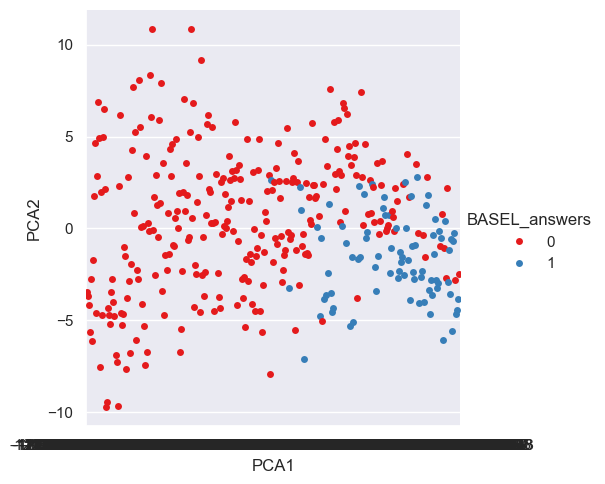

In [32]:
sns.set_theme()
g2 = sns.catplot(x="PCA1", y="PCA2", palette='Set1', hue="BASEL_answers", data=df)
plt.show()

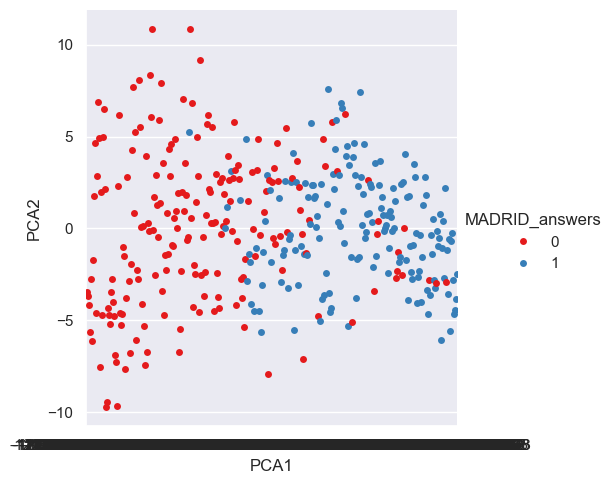

In [33]:
sns.set_theme()
g2 = sns.catplot(x="PCA1", y="PCA2", palette='Set1', hue="MADRID_answers", data=df)
plt.show()

## Revision

In [38]:
df['VALENTIA_answers'] = pleasant2016['VALENTIA_pleasant_weather'].reset_index(drop=True)

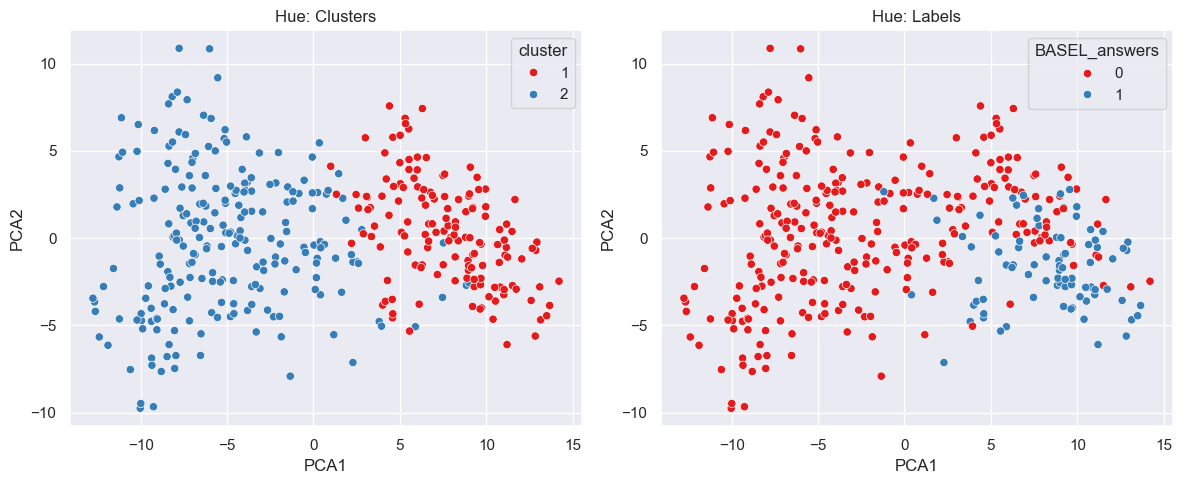

In [40]:
# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Scatterplot with hue as clusters
sns.scatterplot(ax=axes[0], data=df, x='PCA1', y='PCA2', hue='cluster', palette='Set1')
axes[0].set_title("Hue: Clusters")

# Scatterplot with hue as labels
sns.scatterplot(ax=axes[1], data=df, x='PCA1', y='PCA2', hue='BASEL_answers', palette='Set1')
axes[1].set_title("Hue: Labels")

# Adjust layout and display
plt.tight_layout()
plt.show()

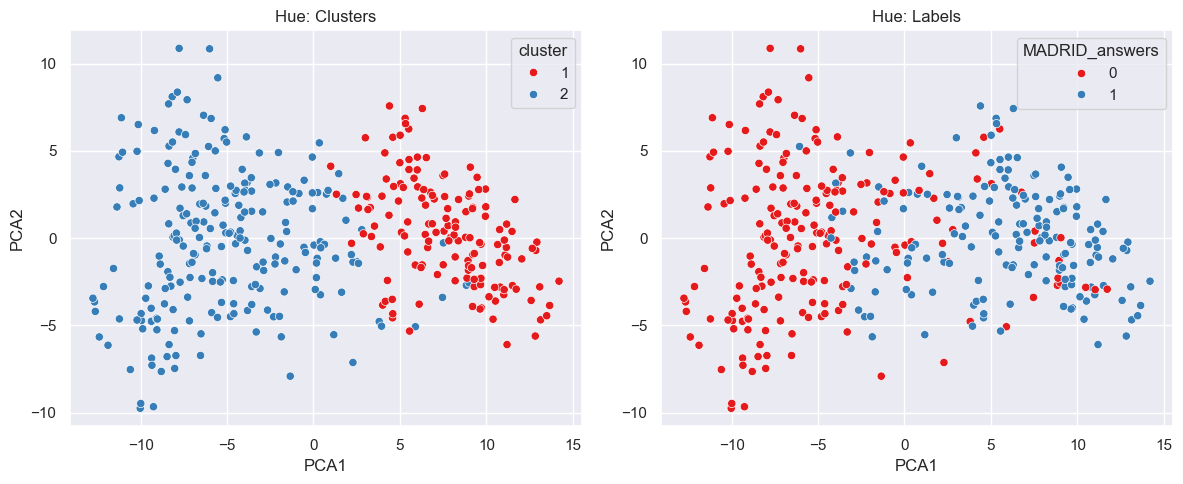

In [42]:
# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Scatterplot with hue as clusters
sns.scatterplot(ax=axes[0], data=df, x='PCA1', y='PCA2', hue='cluster', palette='Set1')
axes[0].set_title("Hue: Clusters")

# Scatterplot with hue as labels
sns.scatterplot(ax=axes[1], data=df, x='PCA1', y='PCA2', hue='MADRID_answers', palette='Set1')
axes[1].set_title("Hue: Labels")

# Adjust layout and display
plt.tight_layout()
plt.show()

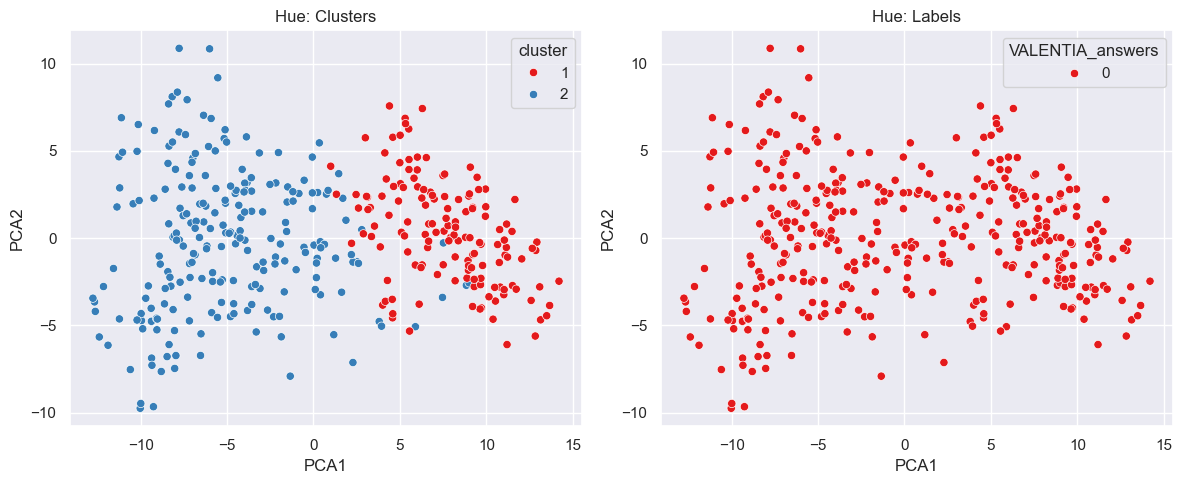

In [44]:
# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Scatterplot with hue as clusters
sns.scatterplot(ax=axes[0], data=df, x='PCA1', y='PCA2', hue='cluster', palette='Set1')
axes[0].set_title("Hue: Clusters")

# Scatterplot with hue as labels
sns.scatterplot(ax=axes[1], data=df, x='PCA1', y='PCA2', hue='VALENTIA_answers', palette='Set1')
axes[1].set_title("Hue: Labels")

# Adjust layout and display
plt.tight_layout()
plt.show()